In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
blueprinty = pd.read_csv("/home/jovyan/Desktop/quarto_website1/projects/project1/HW2/blueprinty.csv")
airbnb = pd.read_csv("/home/jovyan/Desktop/quarto_website1/projects/project1/HW2/airbnb.csv")



In [6]:

print(blueprinty.head())

   patents     region   age  iscustomer
0        0    Midwest  32.5           0
1        3  Southwest  37.5           0
2        4  Northwest  27.0           1
3        3  Northeast  24.5           0
4        3  Southwest  37.0           0


In [3]:
print(airbnb.head())

   Unnamed: 0    id  days last_scraped  host_since        room_type  \
0           1  2515  3130     4/2/2017    9/6/2008     Private room   
1           2  2595  3127     4/2/2017    9/9/2008  Entire home/apt   
2           3  3647  3050     4/2/2017  11/25/2008     Private room   
3           4  3831  3038     4/2/2017   12/7/2008  Entire home/apt   
4           5  4611  3012     4/2/2017    1/2/2009     Private room   

   bathrooms  bedrooms  price  number_of_reviews  review_scores_cleanliness  \
0        1.0       1.0     59                150                        9.0   
1        1.0       0.0    230                 20                        9.0   
2        1.0       1.0    150                  0                        NaN   
3        1.0       1.0     89                116                        9.0   
4        NaN       1.0     39                 93                        9.0   

   review_scores_location  review_scores_value instant_bookable  
0                     9.0       


📊 Mean Patents by Customer Status:
iscustomer
0    3.473013
1    4.133056
Name: patents, dtype: float64


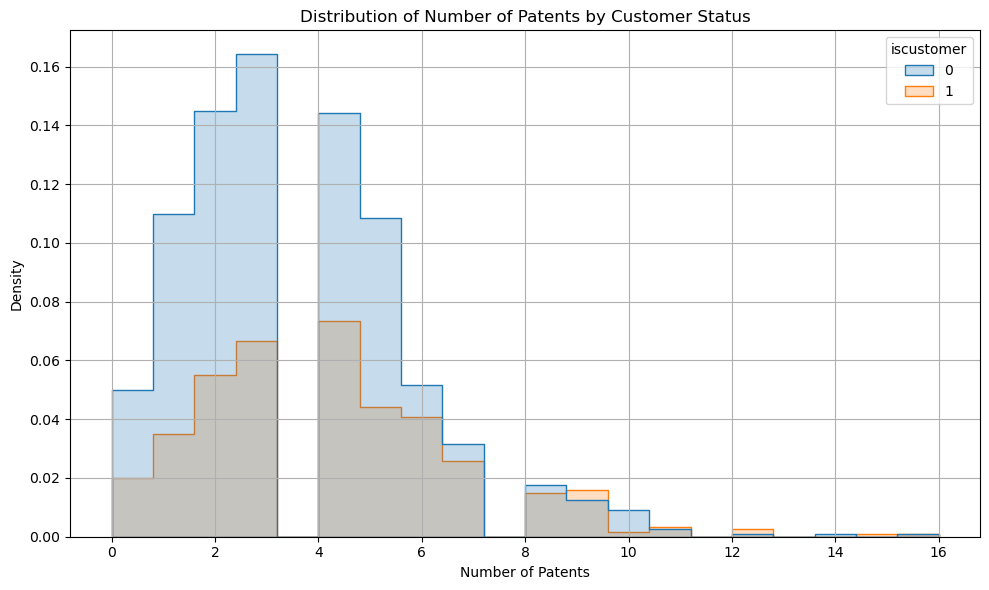

In [4]:

mean_patents = blueprinty.groupby("iscustomer")["patents"].mean()
print("\n📊 Mean Patents by Customer Status:")
print(mean_patents)

plt.figure(figsize=(10, 6))
sns.histplot(data=blueprinty, x="patents", hue="iscustomer", kde=False, bins=20, element="step", stat="density")
plt.title("Distribution of Number of Patents by Customer Status")
plt.xlabel("Number of Patents")
plt.ylabel("Density")
plt.grid(True)
plt.tight_layout()
plt.show()


- On average, Blueprinty customers have more patents than non-customers.
- The histogram shows that customers are more likely to have higher patent counts, while non-customers are concentrated at the lower end.
- This suggests that Blueprinty may be associated with higher patenting activity. However, it’s important to note that correlation does not imply causation — customers may already be more innovative or resource-rich firms.


📊 Mean Age by Customer Status:
iscustomer
0    26.101570
1    26.900208
Name: age, dtype: float64


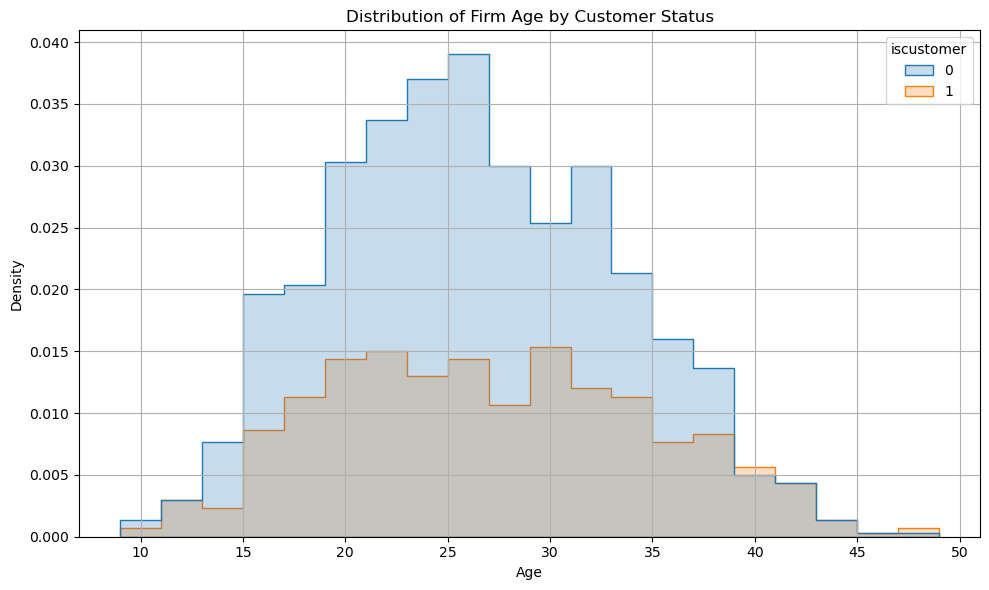

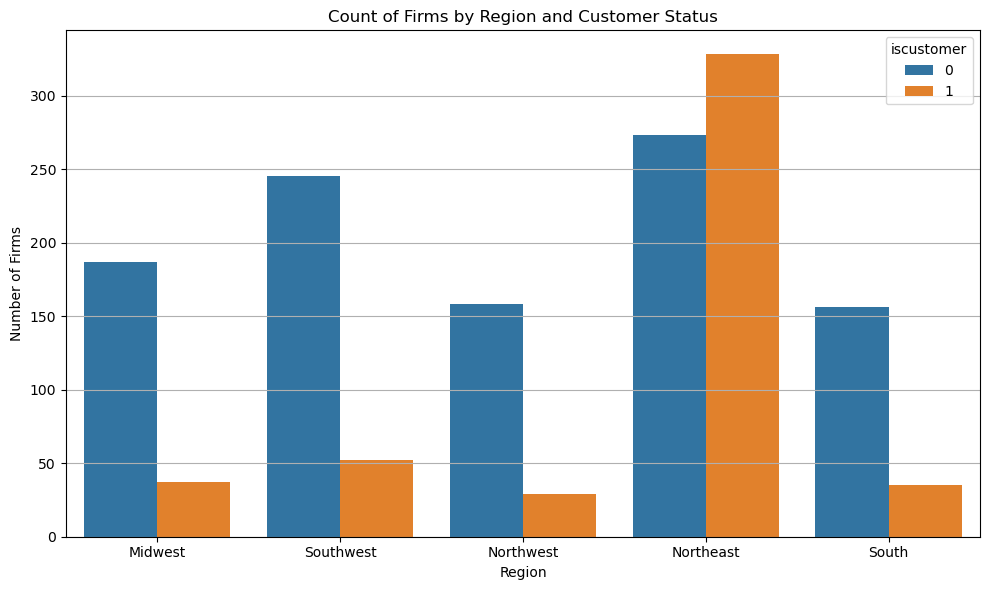

In [5]:
# 📊 Mean Age by Customer Status
mean_age = blueprinty.groupby("iscustomer")["age"].mean()
print("\n📊 Mean Age by Customer Status:")
print(mean_age)

# 📈 Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data=blueprinty, x="age", hue="iscustomer", kde=False, bins=20, element="step", stat="density")
plt.title("Distribution of Firm Age by Customer Status")
plt.xlabel("Age")
plt.ylabel("Density")
plt.grid(True)
plt.tight_layout()
plt.show()

# 📍 Count of Regions by Customer Status
plt.figure(figsize=(10, 6))
sns.countplot(data=blueprinty, x="region", hue="iscustomer")
plt.title("Count of Firms by Region and Customer Status")
plt.xlabel("Region")
plt.ylabel("Number of Firms")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


- Age: Blueprinty customers tend to be slightly older on average than non-customers. The age distribution shows a small shift toward the right for customers.
- Region: Certain regions have more customers than others, indicating possible geographical bias. For example, if the majority of customers are from tech-focused or IP-heavy regions, this could skew the results.
- These findings are important because they show that customer status is not randomly assigned — older firms or firms in specific regions might be more likely to adopt Blueprinty, independent of its actual effect.


### Estimation of Simple Poisson Model

_todo: Write down mathematically the likelihood for_ $Y \sim \text{Poisson}(\lambda)$. Note that $f(Y|\lambda) = e^{-\lambda}\lambda^Y/Y!$.

Let \( Y_i \sim \text{Poisson}(\lambda) \), then the probability mass function is:

\[
f(Y_i|\lambda) = \frac{e^{-\lambda} \lambda^{Y_i}}{Y_i!}
\]

The log-likelihood function for a sample of size \( n \) is:

\[
\ell(\lambda) = \sum_{i=1}^n \left( -\lambda + Y_i \log(\lambda) - \log(Y_i!) \right)
\]


todo: Code the likelihood (or log-likelihood) function

In [ ]:
import numpy as np
from scipy.special import gammaln  # stable log-factorial

def poisson_loglikelihood(lambda_, Y):
    if lambda_ <= 0:
        return -np.inf
    return np.sum(-lambda_ + Y * np.log(lambda_) - gammaln(Y + 1))


todo: Use your function to plot lambda on the horizontal axis...

In [ ]:
Y = blueprinty["patents"].values
lambdas = np.linspace(0.1, 10, 100)
log_liks = [poisson_loglikelihood(l, Y) for l in lambdas]

plt.figure(figsize=(8, 5))
plt.plot(lambdas, log_liks)
plt.xlabel("Lambda")
plt.ylabel("Log-Likelihood")
plt.title("Poisson Log-Likelihood vs Lambda")
plt.grid(True)
plt.show()

todo: If you're feeling mathematical... show lambda_mle = Ȳ

To find the MLE, we take the derivative of the log-likelihood:

\[
\ell(\lambda) = \sum \left( -\lambda + Y_i \log(\lambda) - \log(Y_i!) \right)
\]

Taking the derivative with respect to λ and setting it to zero:

\[
\frac{d\ell}{d\lambda} = -n + \frac{1}{\lambda} \sum Y_i = 0
\Rightarrow \lambda_{\text{MLE}} = \frac{1}{n} \sum Y_i = \bar{Y}
\]

So, the MLE of λ is the sample mean.


 todo: Find the MLE by optimizing your likelihood function with sp.optimize

In [ ]:
from scipy.optimize import minimize_scalar
result = minimize_scalar(
    lambda l: -poisson_loglikelihood(l, Y),
    bounds=(0.001, 10),
    method='bounded'
)

print("MLE for lambda:", result.x)

# next section
